#### Introduction to computer vision, context mainly adopted from 'introduction to computer vision' course on Udacity. Python & Opencv is used in this series of tutorials. 
[source code on GitHub](https://github.com/Max1993Liu/Computer_Vision)

#### Here is a great picture showing the basic idea of corner detection:
![](./img/Corner_Detection.png)

#### Harris Corner:
![](./img/Harris_Corner.png)
Notice that when u and v are both 0, the result will be 0. If the area if all filled up with the same pixel value, then E(u,v) will all be 0 around the area indicating it's NOT a good candidate for corner points.

[Detailed algorithm and mathematics](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html)

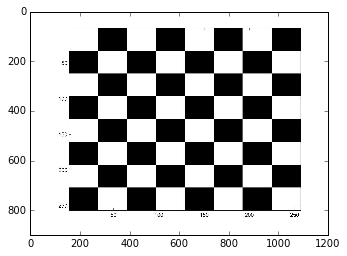

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('./img/corner.jpg', 0)
img = np.float32(img)
plt.imshow(img, cmap = 'gray')

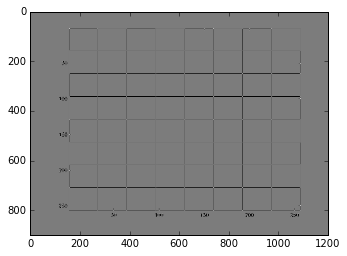

In [2]:
ch = cv2.cornerHarris(img, blockSize = 2, ksize = 3, k = 0.1)
#blockSize is the size of neighbourhood considered for corner detection
#the return is actually a image with the same size
assert ch.shape == img.shape
#take a look at the return 
plt.imshow(ch, cmap = 'gray')

Number of corner points: 446


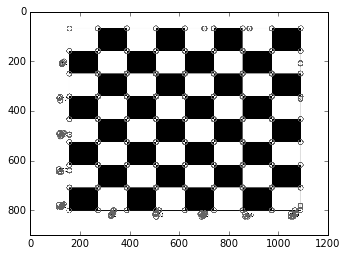

In [3]:
#threshold ch to get corners
#see how many corner points we have with a threshold of 0.5
print 'Number of corner points: {}'.format(np.sum(ch > 0.3*ch.max()))

threshold_matrix = ch > 0.3 * ch.max()
threshold_loc = np.where(threshold_matrix == True)
for x, y in zip(threshold_loc[1], threshold_loc[0]):
    img = cv2.circle(img, (x,y), radius = 10, color = 100, thickness = 2, shift = 0)
plt.imshow(img, cmap = 'gray')


#### Properties of Harris Detector
1. invariant to rotation
2. mostly invariant to additive and multiplicative intensity change (adjust threshold)
3. not invariant to scale change
#### So next step: find something that is scale-INVARIANT!